In [4]:
from infer import InferModule
from keras import models
import json

취미들을 점수 순서대로 정렬해놨기 때문에, 
추천 받은 취미들의 인덱스 값의 범위가 작을수록 유의미한 취미로 판단.

답변의 모든 경우의 수 4096가지를 평가 테스트 케이스로 설정.

전체 경우에 대해서 인덱스 범위를 계산한 후 threshold를 정하여 정확도 판별.


In [5]:
model = models.load_model('./model_saved')
IM = InferModule(model)

In [6]:
with open('./model_saved/base_info.json', encoding='utf-8') as f:
    base_info = json.load(f)
hobby_enum = base_info["hobby_enum"]
hobbies_map = {}
for idx in hobby_enum:
    hobbies_map[hobby_enum[idx]] = idx

In [3]:
def get_indices(u_answer):
    inferringResponse = IM.start_inferring(u_answer)
    hobbies = []
    hobby_answer = inferringResponse["hobbies"]
    for a in hobby_answer:
        hobbies.append(a["name"])
    hobby_indices = []
    for h in hobbies:
        hobby_indices.append(int(hobbies_map[h]))
    return hobby_indices

In [1]:
from itertools import product
answer_list = []
for i in product([1,2], repeat=12):
    answer_list.append(list(i))

In [7]:
strides = []
for u_answer in answer_list:
    hobby_indices = get_indices(u_answer)
    idx_max = max(hobby_indices)
    idx_min = min(hobby_indices)
    stride = idx_max - idx_min
    strides.append(stride)
strides.sort()

1/1 [==============================] - 0s 11ms/step


2023-02-19 17:09:49.218556: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 12ms/step


In [8]:
val_cnt = [0 for _ in range(32)]
for s in strides:
    val_cnt[s] += 1

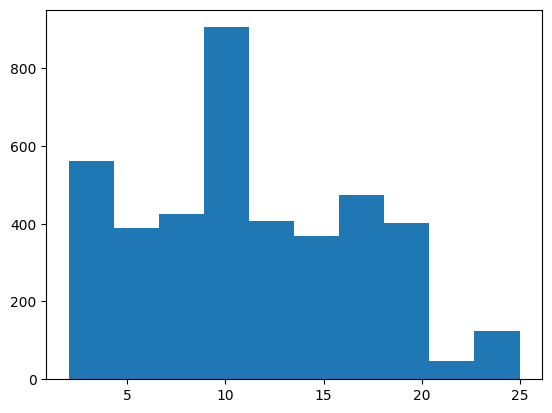

In [9]:
import matplotlib.pyplot as plt

plt.hist(strides)
plt.show()

In [10]:
# 2를 100점으로, 31을 0점으로 한다
len(strides)

4096

In [11]:
norm_scores = [((s * (-1))+31)/29*100 for s in strides]

In [13]:
min(norm_scores)

20.689655172413794

In [14]:
sum(norm_scores)/len(norm_scores)

68.34506330819025